In [127]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import load_model
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import load_model


In [88]:
all_features = np.load('/Users/saikarthik/Desktop/scp/model_building/f.npy')
all_labels = np.load('/Users/saikarthik/Desktop/scp/model_building/l.npy')


In [89]:
y = np.argmax(all_labels, axis=1)

In [90]:
y

array([3, 3, 3, ..., 2, 2, 2])

In [91]:


x_train, x_test, y_train, y_test = train_test_split( all_features, y, test_size=0.2, random_state=42 )

In [125]:
ann_model = load_model('/Users/saikarthik/Desktop/scp/model_building/ga_ann.h5')


In [116]:
rf_model = RandomForestClassifier(n_estimators=400, random_state=42)
rf_model.fit(x_train, y_train)


RandomForestClassifier(n_estimators=400, random_state=42)

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

        Mild       0.94      0.24      0.38       197
    Moderate       0.67      0.33      0.44        18
         Non       0.73      0.96      0.83       645
   Very Mild       0.72      0.66      0.69       475

    accuracy                           0.74      1335
   macro avg       0.77      0.55      0.59      1335
weighted avg       0.76      0.74      0.71      1335



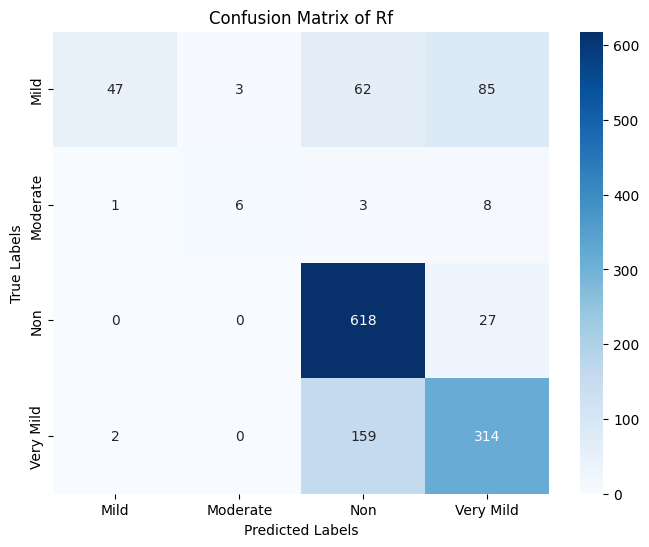

In [138]:
y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred, target_names=["Mild", "Moderate", "Non", "Very Mild"])
print("Classification Report:")
print(report)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["Mild", "Moderate", "Non", "Very Mild"], 
            yticklabels=["Mild", "Moderate", "Non", "Very Mild"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Rf')
plt.show()

In [118]:
rf_probs = rf_model.predict_proba(x_test)  


In [119]:
ann_probs = ann_model.predict(x_test)

42/42 [==============================] - 0s 4ms/step


In [120]:
weights = [0,5,0.5]

combined_probs = (weights[0] * rf_probs +
                  weights[1] * ann_probs)


In [121]:
final_preds = np.argmax(combined_probs, axis=1)

print("Final Predictions:", final_preds)


Final Predictions: [3 2 3 ... 3 2 3]


In [123]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, final_preds)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, final_preds))



Accuracy: 0.8576779026217228
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.91      0.76       197
           1       0.33      0.89      0.48        18
           2       0.96      0.87      0.91       645
           3       0.91      0.83      0.87       475

    accuracy                           0.86      1335
   macro avg       0.71      0.87      0.75      1335
weighted avg       0.89      0.86      0.87      1335



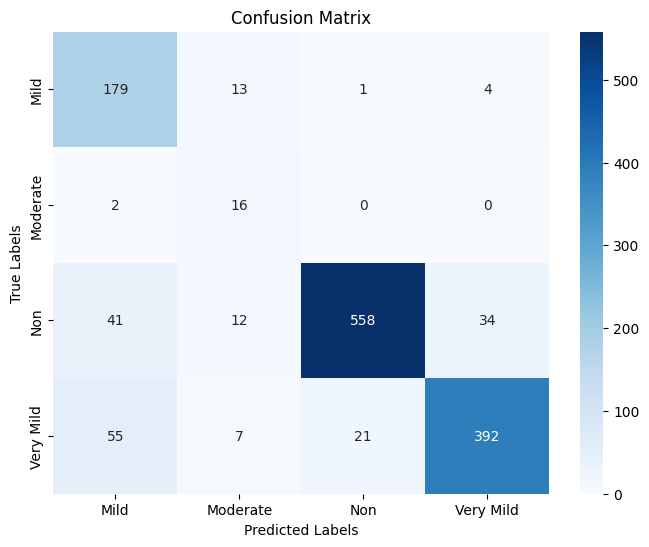

In [108]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, final_preds), annot=True, fmt='d', cmap='Blues', xticklabels=["Mild", "Moderate", "Non", "Very Mild"], 
            yticklabels=["Mild", "Moderate", "Non", "Very Mild"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       197
           1       0.33      0.89      0.48        18
           2       0.90      0.88      0.89       645
           3       0.92      0.75      0.83       475

    accuracy                           0.84      1335
   macro avg       0.70      0.86      0.74      1335
weighted avg       0.86      0.84      0.84      1335



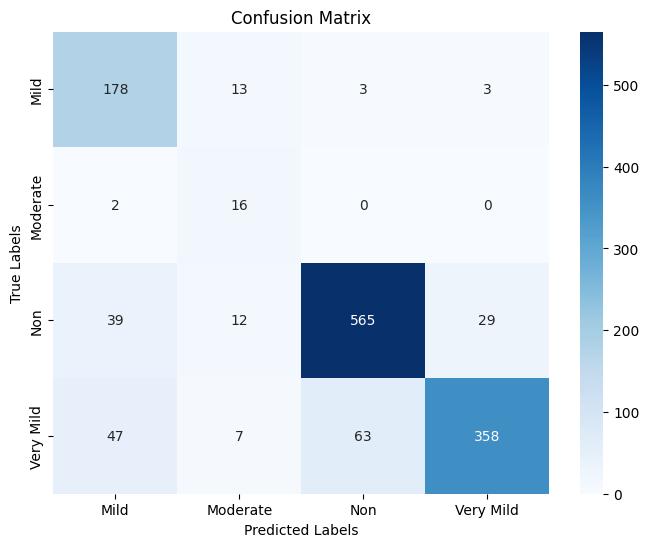

In [139]:
rf = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'rf')  # RF probabilities
ann = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'ann')  # ANN probabilities
combined = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'combined')  # Combined probability

rf['low'] = fuzz.trimf(rf.universe, [0, 0, 0.5])
rf['medium'] = fuzz.trimf(rf.universe, [0, 0.5, 1])
rf['high'] = fuzz.trimf(rf.universe, [0.5, 1, 1])

ann['low'] = fuzz.trimf(ann.universe, [0, 0, 0.5])
ann['medium'] = fuzz.trimf(ann.universe, [0, 0.5, 1])
ann['high'] = fuzz.trimf(ann.universe, [0.5, 1, 1])

combined['low'] = fuzz.trimf(combined.universe, [0, 0, 0.5])
combined['medium'] = fuzz.trimf(combined.universe, [0, 0.5, 1])
combined['high'] = fuzz.trimf(combined.universe, [0.5, 1, 1])

rule1 = ctrl.Rule(rf['high'] & ann['high'], combined['high'])
rule2 = ctrl.Rule(rf['medium'] | ann['medium'], combined['medium'])
rule3 = ctrl.Rule(rf['low'] & ann['low'], combined['low'])

fuzzy_system = ctrl.ControlSystem([rule1, rule2, rule3])
fuzzy_sim = ctrl.ControlSystemSimulation(fuzzy_system)

fuzzy_combined_probs = []
for rf_prob, ann_prob in zip(rf_probs, ann_probs):
    combined_row = []
    for rf_p, ann_p in zip(rf_prob, ann_prob):
        fuzzy_sim.input['rf'] = rf_p
        fuzzy_sim.input['ann'] = ann_p
        fuzzy_sim.compute()
        combined_row.append(fuzzy_sim.output['combined'])
    fuzzy_combined_probs.append(combined_row)

fuzzy_combined_probs = np.array(fuzzy_combined_probs)

final_preds = np.argmax(fuzzy_combined_probs, axis=1)

accuracy = accuracy_score(y_test, final_preds)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, final_preds))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, final_preds), annot=True, fmt='d', cmap='Blues', xticklabels=["Mild", "Moderate", "Non", "Very Mild"], 
            yticklabels=["Mild", "Moderate", "Non", "Very Mild"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()